In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime


dataset = pd.read_csv("C:/Users/pabou/Documents/GitHub/Web-Scraper/data/Cleaned/Cleaned_Depanneur Amigos Gatineau.csv")
print(dataset.describe())
dataset["Date"]=pd.to_datetime(dataset["Date"])
dataset["Time"]=pd.to_datetime(dataset["Time"])
dataset["Date-Time"]=pd.to_datetime(dataset["Date-Time"])
dataset["Unix day"]=dataset["Date"].astype(np.int64)//10**9
print(dataset.head())

Unnamed: 0
count  4445.000000
mean   2836.579528
std    1629.291245
min       0.000000
25%    1429.000000
50%    2836.000000
75%    4242.000000
max    5659.000000
   Unnamed: 0       Date                Time        Type           Date-Time  \
0           0 2017-12-11 2019-12-19 13:31:33  Withdrawal 2017-12-11 13:31:33   
1           2 2017-12-11 2019-12-19 21:59:36  Withdrawal 2017-12-11 21:59:36   
2           3 2017-12-12 2019-12-19 12:34:09  Withdrawal 2017-12-12 12:34:09   
3           4 2017-12-12 2019-12-19 16:38:24  Withdrawal 2017-12-12 16:38:24   
4           5 2017-12-12 2019-12-19 16:54:26  Withdrawal 2017-12-12 16:54:26   

          Fee      Amount    Status    Unix day  
0  $     2.50  $   120.00  Approved  1512950400  
1  $     2.50  $   100.00  Approved  1512950400  
2  $     2.50  $    20.00  Approved  1513036800  
3  $     2.50  $    80.00  Approved  1513036800  
4  $     2.50  $    40.00  Approved  1513036800  


Text(0, 0.5, 'Number of Transactions')

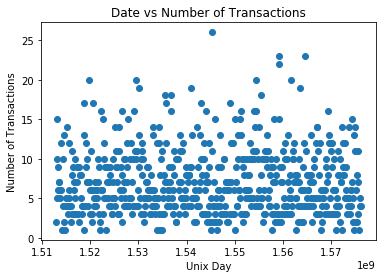

In [4]:
keys=dataset["Unix day"].value_counts().keys().tolist()
vals=dataset["Unix day"].value_counts().tolist()
plt.plot(keys,vals,'o')
plt.title('Date vs Number of Transactions')
plt.xlabel('Unix Day')
plt.ylabel('Number of Transactions')

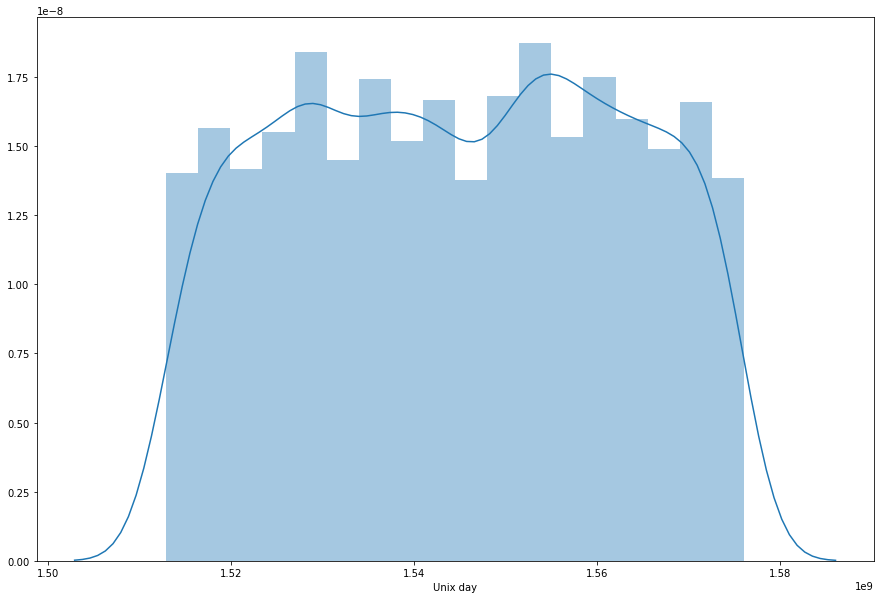

In [5]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Unix day'])

In [10]:
X=np.array(keys).reshape(-1,1) #individual days over a two year period will be our attribute set
y=np.array(vals).reshape(-1,1) #number of transactions will be our label set (ie. what we want to predict)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regressor.intercept_)
print(regressor.coef_) #for every unit of change in unix day, the change in number of transactions is 100.5% or +.5%

[-8.53765208]
[[1.00549401e-08]]


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

Actual  Predicted
0         5   7.094578
1         6   6.814842
2         5   6.857410
3         6   7.188403
4         4   6.968610
..      ...        ...
120       4   6.705380
121       6   6.932123
122       5   6.694955
123      12   6.830479
124      19   6.848723

[125 rows x 2 columns]


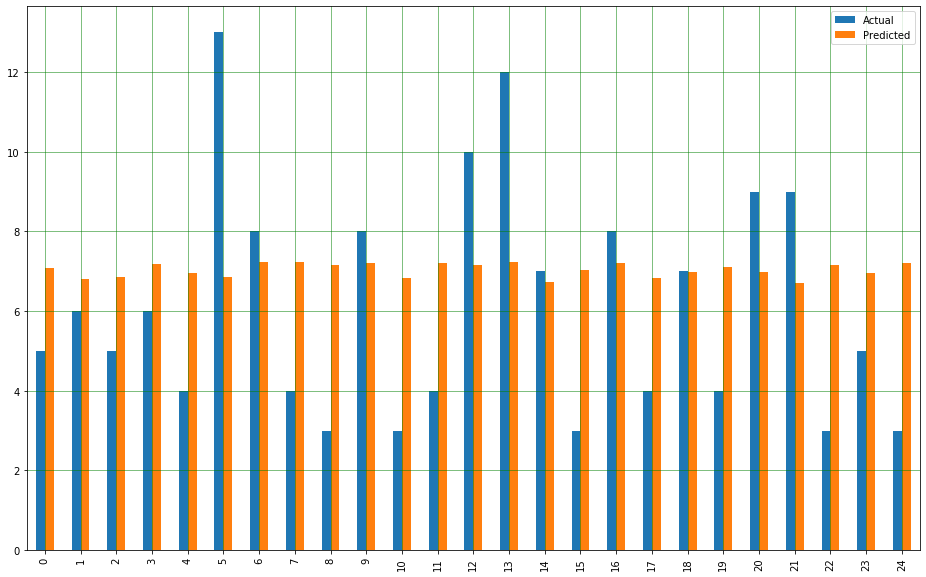

In [17]:
df_head = df.head(25)
df_head.plot(kind="bar",figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

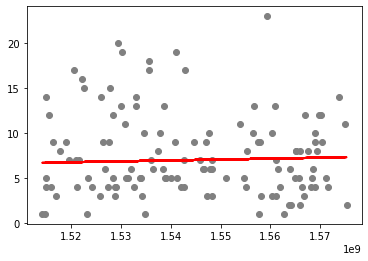

In [18]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()